# Table of contents

- Introduction and objectives

- Input Data

- Data setup/Database

- Workflows and methodology

- Insights and business recommendations

- Way forward

- Conclusions and recommendations

# Introduction and Objectives

The goal of the study is to understand the movie industry with the objective of assisting Microsoft with a series of actionable insights that will help them decide what type of movie they should be creating and under what specific conditions/recommendations based on a real life database coming from different sources. 

When we say specific conditions/recommendations we are referring to variables that will affect their decision making such as profitability in terms of genres, time of the year to release them, investment vs. rate of return, among many others. 

At this point it is important to keep in mind that assessing these variables doesn't guarantee success. What we are trying to do is ask ourselves a series of questions that will reduce the risk and point Microsoft in the right direction to achieve maximum profitability. 


# Input Data

For this project we were given several dataset in the format of .csv and .tsv files all compressed into a unique one. The contents varies between them but in general terms they contain detailed historical data and numerical movie information.

The files received are listed below, classified by their source: 

- Box Office Mojo
    - bom.movie_gross.csv.gz
- IMDB
    - imdb.name.basics.csv.gz
    - imdb.title.akas.csv.gz
    - imdb.title.basics.csv.gz
    - imdb.title.crew.csv.gz
    - imdb.title.principals.csv.gz
    - imdb.titlee.ratings.csv.gz
- TMDB
    - tmdb.movies.csv.gz
- The Number
    - tn.movie_budgets.csv.gz
- Rotten Tomatoes:
    - rt.movies_info.tsv.gz
    - rt_reviews.tsv.gz
  
When putting all of these files together we end up with a rather large number of variables to play with. Due to the short time to submit deliverables we decided to concentrate on only a few of them. This will be explain later on this document with the explanation of why we chose them.

# Data setup/Database

The first step in the project setup was to import all of the necessary libraries which are described below:
    
    - pandas. This is a fast and relatively easy to use open source data analysis and manipulation tool which we used mainly for our data cleaning but but also for some dataframe operations
    - numpy. The fundamental package for scientific computing with Python 
    - sqlite3. SQLite is a C-language library that implements a small, fast, and self- contained SQL database engine. In this project we used it to run our queries
    - matplotlib. Comprehensive library for creating statistical, interactive plots. We used it in combination with SeaBorn to generate our plots
    - seaborn. This is another visualization library based on matplotlib and the main one used for our plots
    - os. A simple module in python that provides functions for interactive with the operating system
    - glob. This is unix style pathname pattern expansion. We used it as part of the code given to us as a starting point for this project
    
With all the libraries in place we loaded the .zip file and create dataframes in pandas which we used to start doing a first pass on each of the individual files to familiarize ourselves with the data.

Due to the nature of each file and because they came from different sources, we treated them as a case by case and didn't establish a proper sequence of step to clean them, therefore they were all clean separately. Furthermore, once finalized, we created a preliminary SQL Schema (Figure 1) with temporary links between them with the idea of refining it later on.

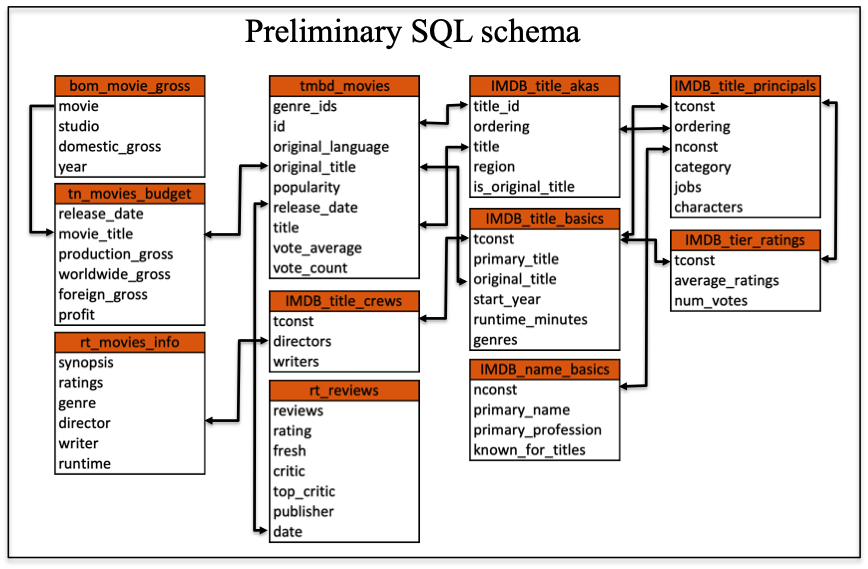

Figure 1. Preliminary SQL Schema

With the SQL database set up, we use it's preliminary schema to address how we could help Microsoft reduce the risk of going into the movie industry with such strong competition and by doing so, how they can maximize their profit. 

The analysis pointed us in the direction of 4 subjects that we could address with the data provided. These are the following:

1. Deciding on a movie budget
2. Number of locations to release the movie(s)
3. Time of the year to release movie(s)
4. Deciding on which genre(s) to focus on

With this explained, let's now look at how to tackle each one of these points:

# Insights and Business Recommendations

## Deciding on a movie budget

As every investor we always want to have a perfect scenario where we invest the minimum, at a low risk and gain the maximum profit possible. This is sometimes not possible and risks are necessary, but these risks can be reduced and controlled to a point where the investor is within his comfort zone, calling this risk acceptable. 

After looking at the type of data provided by Microsoft, we thought that there could be a relationship between the movie reviews, movie budget or investment, and the rate of return. Our assumption was that high investment = high rate of return = high reviews. In general terms, when we look at the movies with the highest budgets, such as "The Avengers", "Avatar", "Titanic", "Star Wars", "The fast and the Furious", among others, they all had very high budgets, high reviews and high rates of return, but there are always exceptions such as "The Dark Phoenix" which ended up losing a whooping 200 million dollars. So we decided to explore our assumption based on the numbers.

For this exercise we filter those movies that had at least 1000 vote_counts (reviews) and then divided them into 8 groups by different review ranges such as ">8", "7.5 - 8", "7 - 7.5", and so on. We understand that this filter is quite aggressive, but we wanted to have only movies with enough reviews to avoid skewing the results. The investment or production_budget (as describe in the provided data) is directly available, however because we are dealing now with 8 different groups based on review values, we decided to calculate the mean values for each one of these groups. The last variable was the Rate of return, which was not available but it was easy to calculate with the data available and following the simple equation below: 

Rate of return = (profit * 100) / production budget

With these three values, we proceeded to generate 2 subplots:

1. Vote Average Range (reviews) vs. Investment (left plot on image below)
2. Vote Average Range (reviews) vs. Rate of Return (right plot on images below)

Keep in mind that both plots are color coded based on the Vote Average, therefore direct links/comparisons can be made between both.

These 2 plots gave us some interesting information which we were not expecting. To make it easier to understand we will list them and directly comment on them:

- There is no relationship between the investment and the Vote Average (review), meaning that a high investment doesn't guarantee a high review, The plot on left shows clearly how the bars are all over the place wit no trends within them.
- The Surprisingly, the movies with the highest reviews (>=8) are the ones with the lowest investment (production budget).
- As expected, the highest reviews are producing the highest rate of return, so no surprises in this one, and as the plot on the right suggests, there is a clear linear trend with a positive slope (going from right to left on Figure 2) suggesting that in average, the better reviews result in high rate of return. 


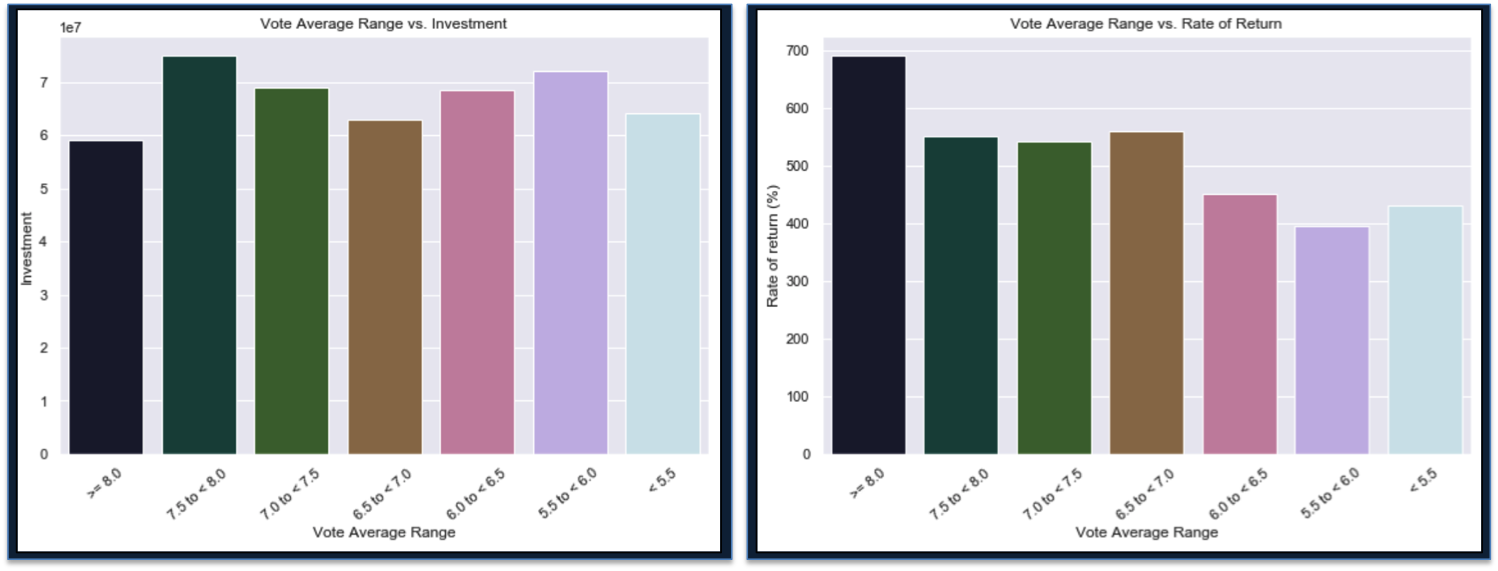

Figure 2. Subplots comparing "Vote Average Ranges vs. Investment" (left) and "Vote Average Range vs. Rate of return(%)" (right) 

One of the interesting findings from the two previous plots is the fact that the movies with the highest cost are not the ones with the highest rate of return, in the contrary, it is the movies with the lowest budgets here that are giving the highest rate of return. To illustrate this better the plot on Figure 3 was created. The Y scale is reserved so that focused on that larger value first as it is very clear at that point that you are getting almost a 700% rate of return with a movie budget of near 60 million Dollars. We thought this would be interesting to illustrate as a key point for Microsoft to consider.

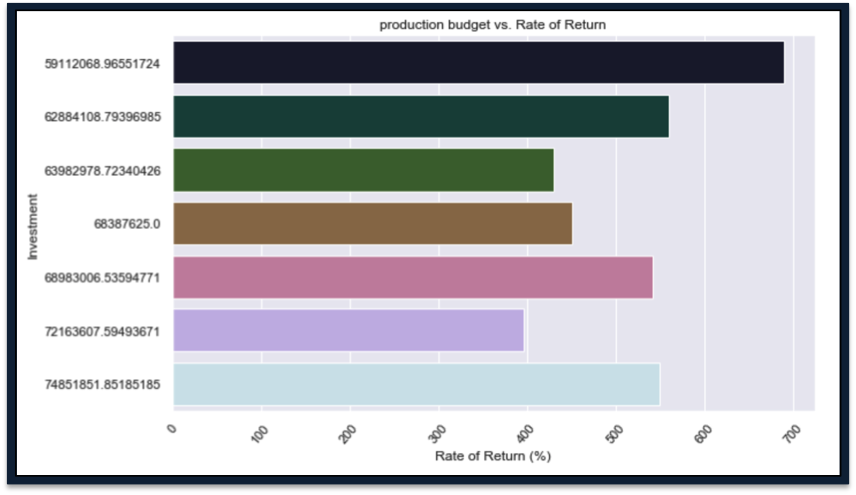

Figure 3. Plot comparing "Rate of return vs. Investment"

Our recommendation for Microsoft based on these finding is to focus on what the public wants and likes instead of blockbuster titles that will cost them significant amounts of cash. So a market study to better understand genres and maybe combinations of actors, directors, writers could give interesting and insightful information 

## Number of locations to release the movie(s)


In previous decades you could assume that a movie needs to do well in the USA and 1 or 2 other regions. Now that the budgets of movies are higher and the world being a much more connected place can that assumption still be true? 

When looking at the number of regions a title have been released and comparing it's profit you can see a clear upward trend. On the flip-side, this doesn't guarantee that the budget costs will be recouped and the title will be profitable. 

There may be other factors that affect the profitability of the movie other than the idea that if you increase the regions it's available in then you'll have more viewers and therefore profit. By looking at this chart, you can see that having a title available in over 30 regions and less than 50 shows signs of a higher upside compared to the initial budget.

<br>


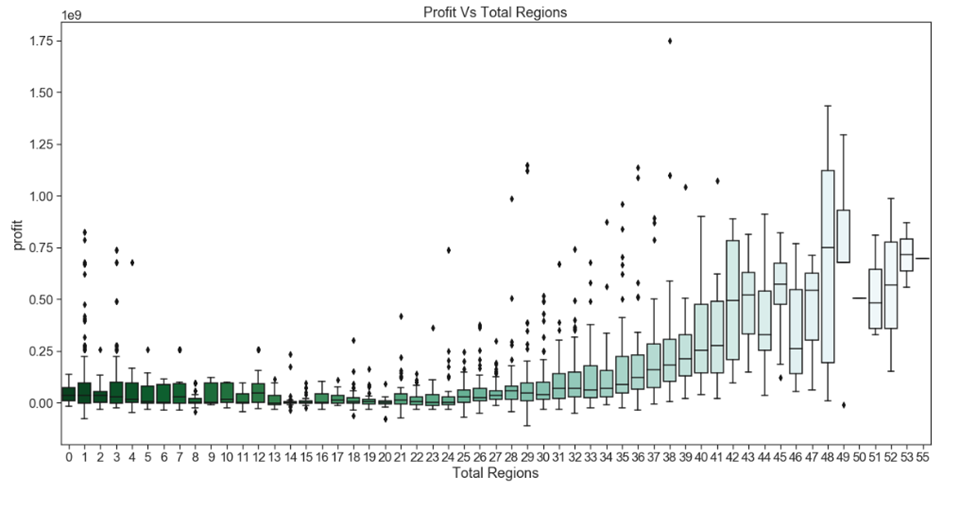

 Figure 4. Plot comparing "Total regions vs. Profit"


## Time of the year to release movie(s)

With the previous findings, we ask ourselves when the best time of the year would be to release titles. We know about the relationship between cost/budget, reviews, and rate of return, and the number of locations that we should consider for releasing new titles, but now the question is when would it be the most profitable to release movies during the year? 

Our assumption here was the obvious: Lets release movies during the holidays, meaning Christmas and during the summer when most students are free. So lets see how that stands out with some more analysis.

We addressed this question by filtering our data by running a query in SQL to get the top 4000 movies with the most vote_counts. The reason why we did it this way is because we want to look at the most popular titles and we want to discard the not very relevant movies. Again 4000 seems a strong filter but we believe it is fit for purpose.

With the top 4000 movies in terms of votes, we classified them by release date and defined the seasons as follows:

Winter = December, January and February
Spring = March, April and May
Summer = June, July and August
Autumn = September, October and November

At this point we just needed to create a plot to compare "Seasons vs. Mean Profit" (Figure 5)

The plots is very ease to interpret and at a first glance it seems as our predictions were right. Microsoft should focus on Summer and as the plot on Figure 5 suggest, the winter. The season to avoid is quite obvious as well corresponding to autumn.

Now,when exactly in terms of months should movies be released? is there any particular month that we should focus on? or any months that we should avoid? To answer these questions we decided to breakdown the seasons into months and then generate four subplots vertically (Figure 6) so that we can easily compare them.

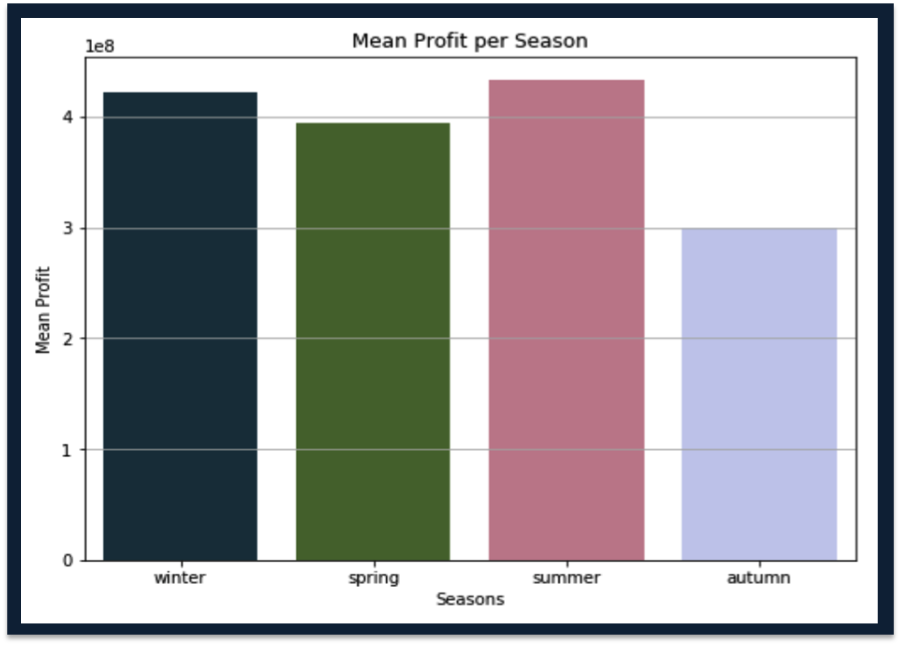

Figure 5. Plot comparing the "Seasons vs. Mean Profit"

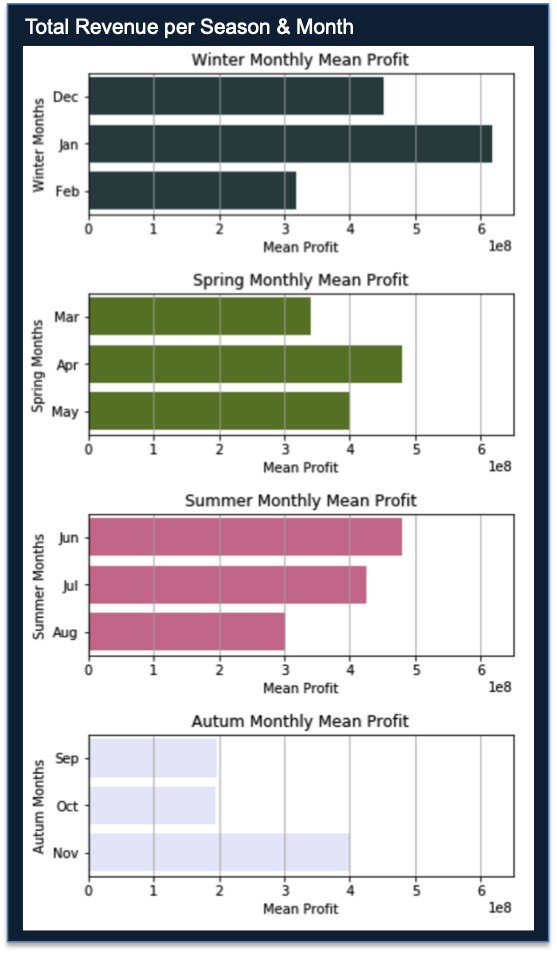

To our surprise December is not the best month to release movies, it is not a bad one either, but there are 3 better months that we should focus on, and these are January, June and April. 

June is the beginning of the summer so it is a no brainer. April coincides with the school holidays in most of Europe so that is understandable as well, but January was a total surprise. We didn't expect January to be the best month of the year when we are coming out of Christmas and are at the beginning of a new year. 

Our recommendation to Microsoft is clear here: focus on releasing movies within the months of January, April and June, and as a forth option December. Avoid at all cost Autum unless it's at the end in November when profits seem to pick up again. If you can't focus on detailed months and you have to start with seasons, focus on summer and winter.

Figure 6. 4x1 subplots displaying the four seasons divided by month comparing the Mean Profit vs. Month

## Deciding on which genre(s) to focus on

Looking at movies that have bee in the cinemas in the last decade you may think that all you need is a Marvel movie and you're set and on your way to success but that isn't the case (Disney have their own streaming channel now!). Another assumption we could make is that Sci-Fi movies and Actions movies in general are likely to do well but to our surprise there are some genres that I wouldn't have guessed have done well.

When working through the available data we found that genres were listed for titles as either own their own e.g. 'Action' or as part of a group e.g. "Sci-Fi, Action, Romance". We decided to treat each genre separately by creating another DataFrame and checking for a genre as being contained in the group.
<br>
<br>
```python
# This loop was used to separate the grouped genres and create a unique list
genres = []
for value in df['genres']:
    genres_list = value.split(',')
    for genre in genres_list:
        genres.append(genre)
genres = np.unique(genres)

```
<br>
<br>

From the data a finding we can come to is that Animation, Adventure, Musical and Reality TV are very popular and profitable.

Further analysis would be needed to see if combinations of these or where more than one these genres form the majority of the group are more popular and profitable.

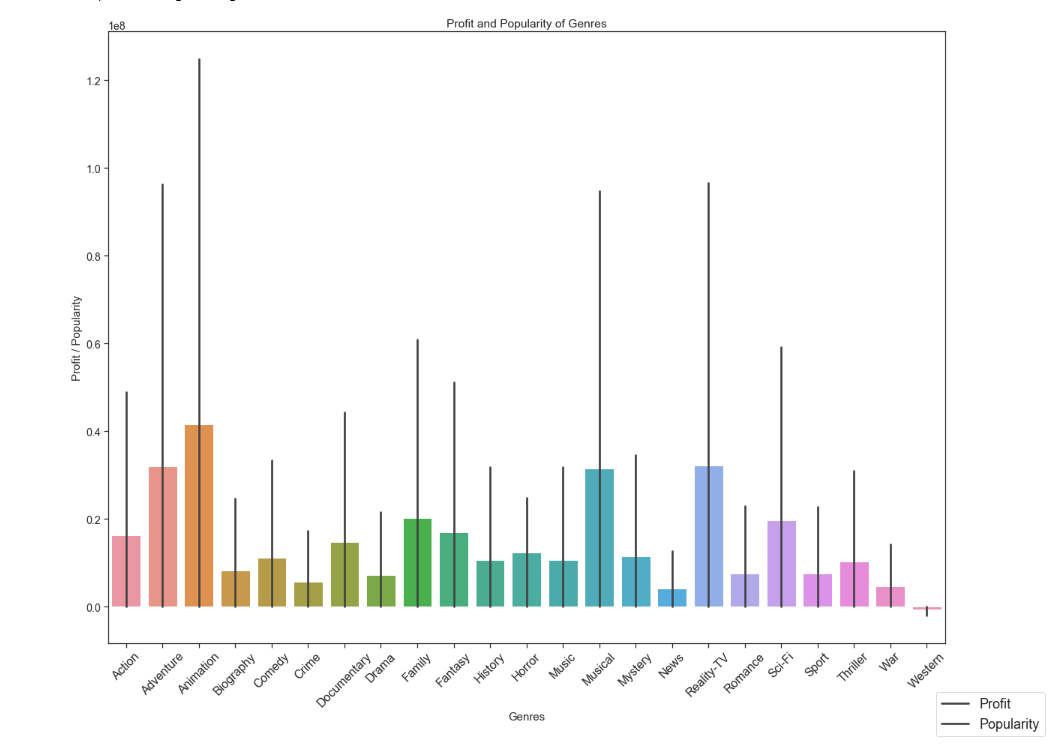


# Way forward

- Increase the dataset to close existing holes/gaps

- Fine tune the SQL database 
It would a great tool to have if every table is properly cleaned so that the joins between them is possible without so much struggle. Maybe going back to cleaning them and dropping some additional rows but this will imply eliminating some movies from our database

- Combination of directors, producers and main actor
However to answer this we will need further data. The impact of having this information can be huge though

- Further analysis of how genres in different combination affect its popularity and profitability. For example the 'Scary Movie's in the 1990/2000s were a strange combination of horror and comedy that proved to be a hit.

- Scraping additional data from rotten tomatoes to compare audience and critic scores to see how they relate to how a movie performs.


# Conclusions and recommendations



We have already listed and explained a series of recommendations after addressing them via EDA. The following 4 bullet points are a summary of them:

1. The highest investment/movie budget will not guarantee the highest rate of return. Follow the audience reviews and make decisions accordingly

2. Movies release in 1-13 regions are more likely to be profitable

3. Release your block buster movies during the summer and winter, focusing on the months of January and June, with April and December as contingency months

4. Animation, adventure, musical and reality TV are more popular and profitable
